# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [22]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [23]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [24]:
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [25]:
#  1. Get the total rides for each city type
groupby_type = pyber_data_df.groupby('type')
total_ride_city_type = groupby_type.ride_id.count()

total_ride_city_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [26]:
# 2. Get the total drivers for each city type
city_type_drivercount_df = pyber_data_df[['city', 'type', 'driver_count']].copy()
city_type_drivercount_df.drop_duplicates(inplace = True)

groupby_type2 = city_type_drivercount_df.groupby('type')
total_driver_city_type = groupby_type2.driver_count.sum()

total_driver_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [27]:
#  3. Get the total amount of fares for each city type
total_fare_city_type = groupby_type.fare.sum()

total_fare_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [28]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride = total_fare_city_type / total_ride_city_type

average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [29]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = total_fare_city_type / total_driver_city_type

average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [30]:
total_driver_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [31]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame()
pyber_summary_df['Total Rides'] = total_ride_city_type
pyber_summary_df['Total Drivers'] = total_driver_city_type
pyber_summary_df['Total Fares'] = total_fare_city_type
pyber_summary_df['Average Fare per Ride'] = average_fare_per_ride
pyber_summary_df['Average Fare per Driver'] = average_fare_per_driver

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [32]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [33]:
#  8. Format the columns.
formats = {'Total Rides': '{:,}',
           'Total Drivers': '{:,.0f}',
           'Total Fares': '${:,.2f}',
           'Average Fare per Ride': '${:,.2f}',
           'Average Fare per Driver': '${:,.2f}'}

pyber_summary_df.style.format(formats)

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [34]:
# 1. Read the merged DataFrame
df = pyber_data_df.copy()

In [35]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
groupby_type_date = df.groupby(['type', 'date'])
type_date_fare = groupby_type_date.fare.sum()
type_date_fare.head()

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
Name: fare, dtype: float64

In [36]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
type_date_fare = type_date_fare.reset_index()
type_date_fare.head()

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [37]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
tdf_pivot = type_date_fare.pivot(index = 'date', columns = 'type', values = 'fare')
tdf_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [38]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
tdf_pivot_2 = tdf_pivot.loc['2019-01-01' : '2019-04-29'].copy()
print(tdf_pivot_2.head())
print(tdf_pivot_2.tail())

type                 Rural  Suburban  Urban
date                                       
2019-01-01 00:08:16    NaN       NaN  37.91
2019-01-01 00:46:46    NaN     47.74    NaN
2019-01-01 02:07:24    NaN     24.07    NaN
2019-01-01 03:46:50    NaN       NaN   7.57
2019-01-01 05:23:21    NaN       NaN  10.75
type                 Rural  Suburban  Urban
date                                       
2019-04-28 14:28:36    NaN       NaN  11.46
2019-04-28 16:29:16    NaN       NaN  36.42
2019-04-28 17:26:52    NaN       NaN  31.43
2019-04-28 17:38:09    NaN     34.87    NaN
2019-04-28 19:35:03    NaN     16.96    NaN


In [39]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
tdf_pivot_2.index = pd.to_datetime(tdf_pivot_2.index)

In [40]:
# 7. Check that the datatype for the index is datetime using df.info()
tdf_pivot_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
Rural       114 non-null float64
Suburban    573 non-null float64
Urban       1509 non-null float64
dtypes: float64(3)
memory usage: 68.6 KB


In [41]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
tdf_weekly = tdf_pivot_2.resample('W').sum()
tdf_weekly.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [42]:
tdf_weekly.columns

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

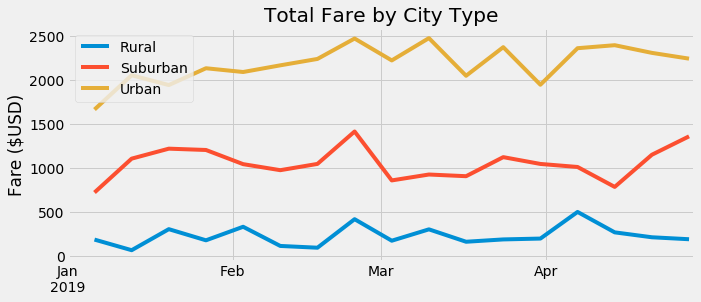

In [70]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
from matplotlib import dates as mdates

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig, ax = plt.subplots()

#All three share same x-axis, set three different lines to plot
x_axis = tdf_weekly.index
y_axis_rural = tdf_weekly.Rural
y_axis_urban = tdf_weekly.Urban
y_axis_suburban = tdf_weekly.Suburban

ax.set_title('Total Fare by City Type')

#See below appendix, I pulled the pantones for the lines to force the colors to match what the example had
ax.plot(x_axis, y_axis_rural, label='Rural', color = '#008fd5')
ax.plot(x_axis, y_axis_suburban, label='Suburban', color = '#fc4f30')
ax.plot(x_axis, y_axis_urban, label='Urban', color = '#e5ae38')

#https://www.larsgregori.de/2020/01/05/how-to-make-inline-plots-in-jupyter-notebook-larger/
#I was having issues trying to match the perspective of the image on the challenge page
plt.rcParams['figure.figsize'] = (10,3)

#https://stackoverflow.com/questions/71270630/how-to-show-only-the-monthly-ticks-in-the-x-axis-when-using-dataframe-plot
#I set the major axis to be year, you only see it once since the year is the same and starts at 0
#Minor axis is the month
ax.xaxis.set_major_locator(mdates.YearLocator(month =1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=range(1,12,1)))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

#https://stackoverflow.com/questions/66779488/how-to-align-major-and-minor-tick-labels-exactly-next-to-each-other-with-matplot
ax.get_xaxis().set_tick_params(which='major', pad=20)

#Add the grid to the image
ax.grid(b=True, which='minor')

#I used this to get rid of the May tick mark, for some reason it kept showing up without this
ax.set(xlim=('2019-01-01', '2019-04-29'))

ax.set_ylabel("Fare ($USD)")
ax.legend()

plt.savefig("analysis/Fig1.png", bbox_inches = "tight")

### Appendix

In [71]:
#https://stackoverflow.com/questions/56211675/get-colors-from-matplotlib-style
#Has a way to list the pantones for the different styles so I could force the above lines to exactly match
#the colors in the challenge

for style in plt.style.library: 
    the_rc = plt.style.library[style] 
    if 'axes.prop_cycle' in the_rc: 
        colors = the_rc['axes.prop_cycle'].by_key()['color'] 
        print('%25s: %s'%(style, ', '.join(color for color in colors))) 
    else: 
        print('%25s: this style does not modify colors'%style)

                      bmh: #348ABD, #A60628, #7A68A6, #467821, #D55E00, #CC79A7, #56B4E9, #009E73, #F0E442, #0072B2
                  classic: b, g, r, c, m, y, k
          dark_background: #8dd3c7, #feffb3, #bfbbd9, #fa8174, #81b1d2, #fdb462, #b3de69, #bc82bd, #ccebc4, #ffed6f
                     fast: this style does not modify colors
          fivethirtyeight: #008fd5, #fc4f30, #e5ae38, #6d904f, #8b8b8b, #810f7c
                   ggplot: #E24A33, #348ABD, #988ED5, #777777, #FBC15E, #8EBA42, #FFB5B8
                grayscale: 0.00, 0.40, 0.60, 0.70
           seaborn-bright: #003FFF, #03ED3A, #E8000B, #8A2BE2, #FFC400, #00D7FF
       seaborn-colorblind: #0072B2, #009E73, #D55E00, #CC79A7, #F0E442, #56B4E9
     seaborn-dark-palette: #001C7F, #017517, #8C0900, #7600A1, #B8860B, #006374
             seaborn-dark: this style does not modify colors
         seaborn-darkgrid: this style does not modify colors
             seaborn-deep: #4C72B0, #55A868, #C44E52, #8172B2, #CCB974, #64B5CD